### 1.0 Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

Though Kurt has been selling used cars for over 20 years, he now wants to focus more on customer satisfaction instead of just sales and profits.  Accordingly, Kurt has asked me to provide a clear picture for what customers care most about in a used car purchase.   Simply put, Kurt asked me this question, "What's the best way to price a used car?".

### 2.0 Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

Explore Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Initial exploration
df = pd.read_csv("../data/vehicles.csv")
df.info()


<class 'pandas.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  str    
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  str    
 5   model         421603 non-null  str    
 6   condition     252776 non-null  str    
 7   cylinders     249202 non-null  str    
 8   fuel          423867 non-null  str    
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  str    
 11  transmission  424324 non-null  str    
 12  VIN           265838 non-null  str    
 13  drive         296313 non-null  str    
 14  size          120519 non-null  str    
 15  type          334022 non-null  str    
 16  paint_color   296677 non-null  str    
 17  state         426880 non-null  str    
dtypes: float64(2), 

From the info above, the dataframe has 426880 rows.  Most of the columns have non-null data except for "condition", "cylinders" and "size".  At this point, we don't know if those columns can be dropped or if they are relavent to predicting price.

In [3]:
# Clearly condition, cylinders and size columns have missing data
# Print out the percent data complete for each column, click between table and chart view to see magnitude of missing data
non_null_pct = df.notnull().mean().sort_values(ascending=False) * 100
non_null_pct


id              100.000000
region          100.000000
state           100.000000
price           100.000000
year             99.717719
transmission     99.401237
fuel             99.294181
odometer         98.969265
model            98.763821
title_status     98.069247
manufacturer     95.866286
type             78.247283
paint_color      69.498922
drive            69.413653
VIN              62.274644
condition        59.214768
cylinders        58.377530
size             28.232524
dtype: float64

In [4]:
df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


Since only id, price, year and odometer have numeric values, describe only shows these columns.  Whoa!  Note the price column, price, has a mean of 7.5199e4, or $75,199, which might be good for new exotic cars, but not used cars.  The max is 3.7 Billion dollars, clearly there is errant data in this dataset.

In [37]:
df["price"].sort_values(ascending=False).head(20)


318592    3736928711
356716    3736928711
257840    3024942282
91576     3024942282
37410     3009548743
184704    1410065407
153082    1234567890
29386     1111111111
37409     1111111111
122470     987654321
280        987654321
230753     135008900
193736     123456789
288356     123456789
307488     123456789
358555     123456789
137807     123456789
207080     123456789
241404     113456789
1838        99999999
Name: price, dtype: int64

From above we can see the top 20 prices range from 3.7 Billion dollars
to  987 Million dollars.  This data needs to be cleaned!

In [10]:
# let's filter out price to be in a reasonable range for a used car.
# Kurt has indicated he only sells cars in the $500 to $25000 range.
df_clean = df[df["price"].between(500, 25000)]
df_clean["price"].describe()

count    271275.000000
mean      11563.731339
std        6664.193732
min         500.000000
25%        5995.000000
50%       10499.000000
75%       16987.000000
max       25000.000000
Name: price, dtype: float64

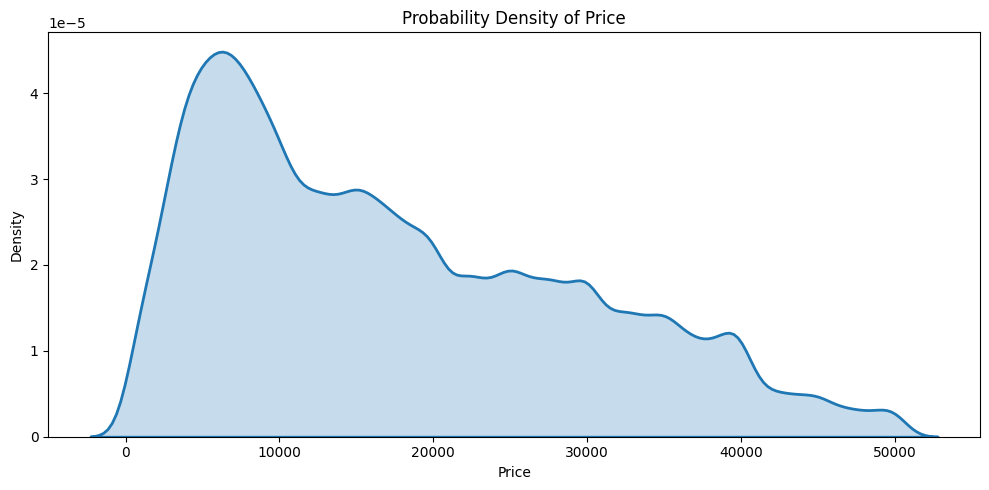

In [9]:
plt.figure(figsize=(10, 5))

sns.kdeplot(
    data=df_clean,
    x="price",      # replace with your column name
    fill=True,      # nice shading under the curve
    linewidth=2
)

plt.title("Probability Density of Price")
plt.xlabel("Price")
plt.ylabel("Density")
plt.tight_layout()
plt.show()


Let's explore these columns first, size, cylinders, condition, VIN, drive, paint_color, type

In [30]:
df["size"].value_counts()

size
full-size      63465
mid-size       34476
compact        19384
sub-compact     3194
Name: count, dtype: int64

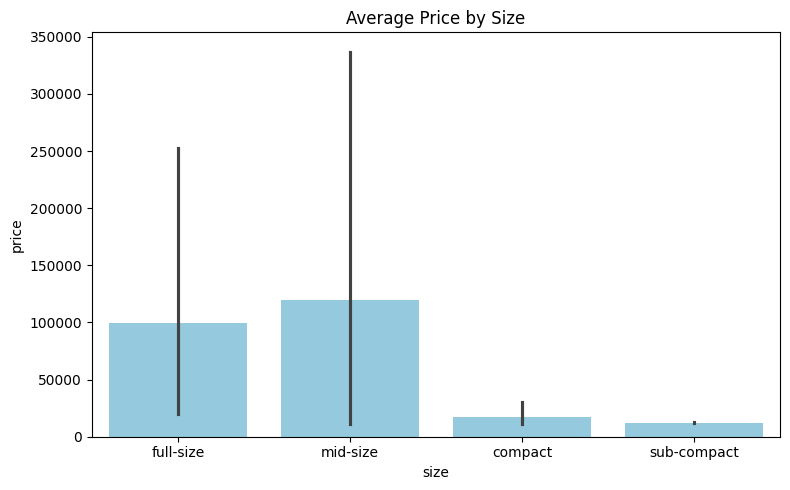

In [33]:
plt.figure(figsize=(8, 5))

sns.barplot(
    data=df,
    x="size",
    y="price",
    color="skyblue",
    estimator="mean"
)

plt.title("Average Price by Size")
plt.tight_layout()
plt.show()


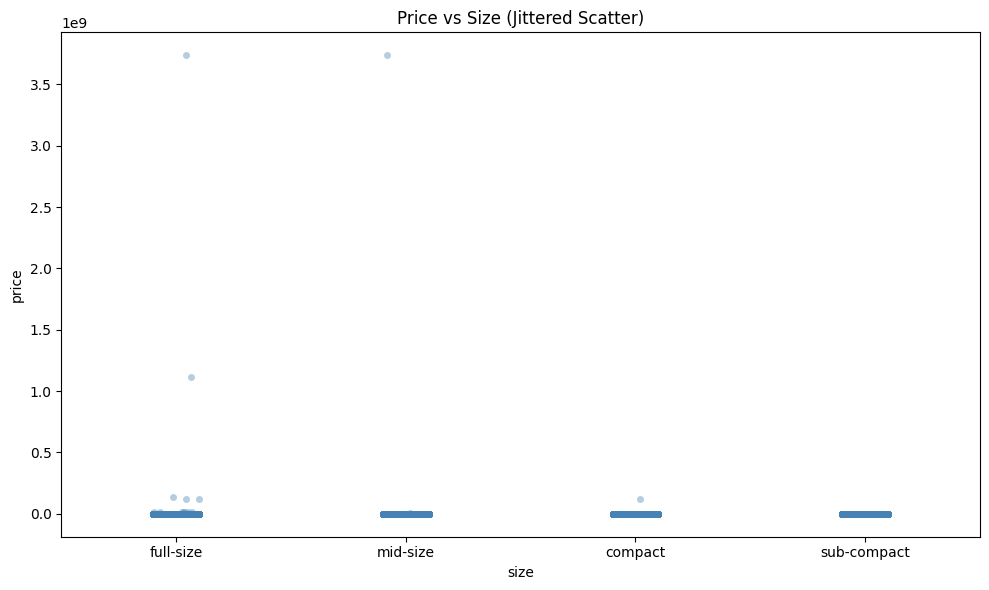

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

sns.stripplot(
    data=df,
    x="size",
    y="price",
    jitter=True,
    alpha=0.4,
    color="steelblue"
)

plt.title("Price vs Size (Jittered Scatter)")
plt.tight_layout()
plt.show()


### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.